# Regressão

A documentação necessário das ferramentas usadas podem ser vistitadas em:

- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [Train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

## Importar conjunto de dados

In [5]:
import pandas as pd
dataframe = pd.read_csv('https://raw.githubusercontent.com/sullyvan15/datasets/master/weather.csv')

print(dataframe.shape)
print(dataframe.dtypes)
print(dataframe.describe())

(366, 22)
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object
          MinTemp     MaxTemp    Rainfall  ...     Temp9am     Temp3pm     RISK_MM
count  366.000000  366.000000  366.000000  ...  366.000000  366.000000  366.000000
mean     7.265574   20.550273    1.428415  ...   12.358470   19.230874    1.428415
std      6.025800    6.690516    4.225800  ...    5.630832    6.640346    4.225800
min     -5.300000    7.600000    0.000000  ...    0.100000    5.100000    0.000000
25%      2.

## Relação entre dois atributos

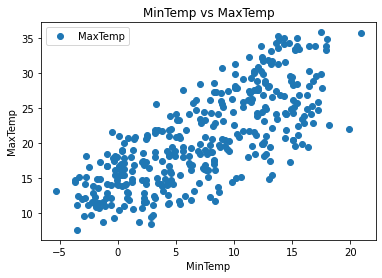

In [6]:
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

dataframe.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title("MinTemp vs MaxTemp")
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

## Correlação entre todos atributos

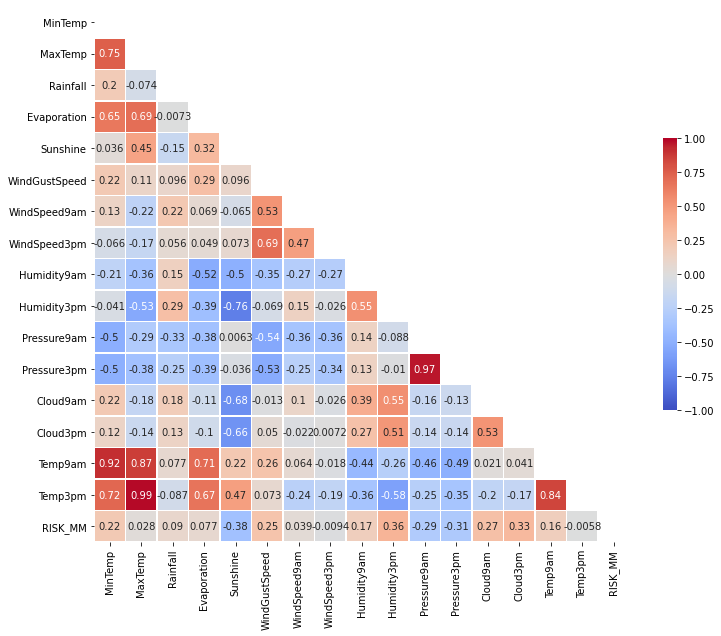

In [7]:
import numpy as np
plt.figure(figsize=(12,10))

dataframe = dataframe.select_dtypes(exclude=['object'])

cor = dataframe.corr()

mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(cor,
            annot=True,
            mask=mask,
            cmap=plt.cm.coolwarm,
            xticklabels=dataframe.columns,
            yticklabels=dataframe.columns,
            vmin=-1, vmax=1, center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5})

plt.show()

## Distribuição de dados

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


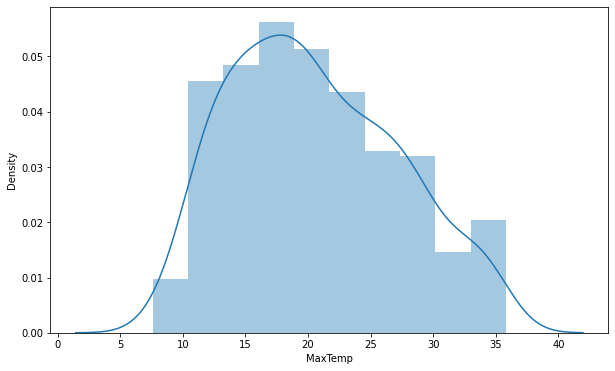

In [8]:
plt.figure(figsize=(10, 6))
sns.distplot(dataframe['MaxTemp'])
# dataframe['MaxTemp'].plot.hist()
plt.show()

## Data splicing

In [9]:
X = dataframe[['MinTemp']]
y = dataframe['MaxTemp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Treinando o algoritmo

In [10]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Informações do Modelo

In [11]:
print('Intercept:', clf.intercept_)
print('Coefficient:', clf.coef_)

Intercept: 14.546604995508298
Coefficient: [0.83250593]


## Predição

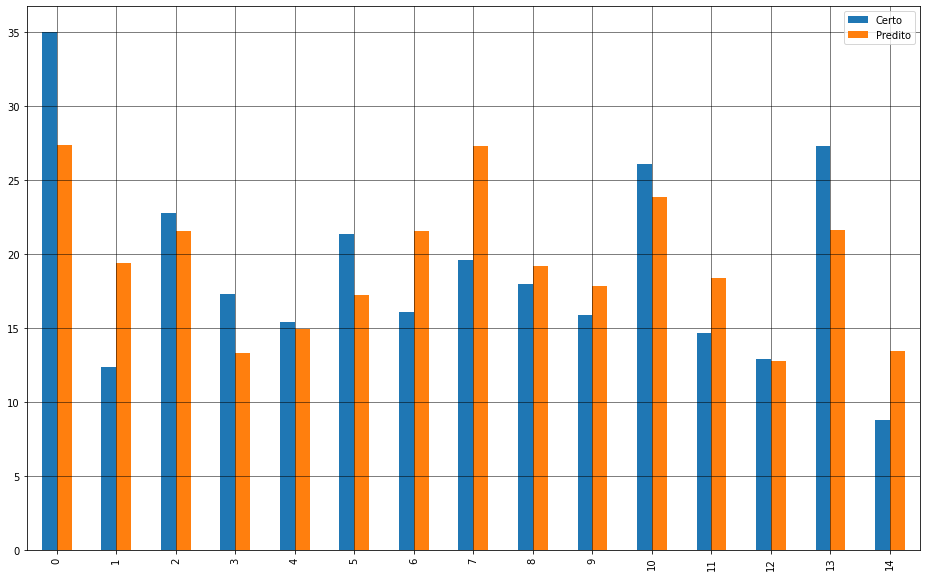

In [12]:
y_pred = clf.predict(X_test)

df = pd.DataFrame({"Certo": y_test.values, "Predito": y_pred})

df.head(15).plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.show()

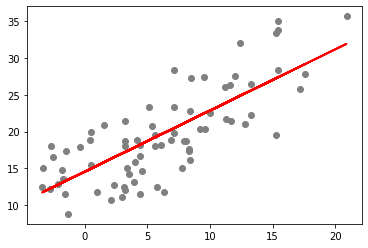

In [13]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

## Avaliação do Modelo

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
    
print("Erro absoluto médio:", mean_absolute_error(y_test, y_pred))
print("Erro quadrático médio:", mean_squared_error(y_test, y_pred))
print("Raiz do erro quadrático médio:", np.sqrt(mean_squared_error(y_test, y_pred)))

Erro absoluto médio: 3.348027322657814
Erro quadrático médio: 15.891118530443595
Raiz do erro quadrático médio: 3.9863665825465167
